In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = f"http://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?lat=[ 37.84289563  85.03894562  77.527722   ... -42.78430108 -35.62927568
  -3.92580168]&lon=[ 145.84038516   -2.83722491  135.79076407 ... -161.68431228 -111.46162754
 -117.44557225]units=Imperial&appid=5246f387df9dddf5a7e15fb616f68bdc


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamaishi
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | ledyard
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | olavarria
Processing Record 8 of Set 1 | tommot
Processing Record 9 of Set 1 | biankouma
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | general pico
Processing Record 15 of Set 1 | yanan
City not found. Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | albany
Processing 

Processing Record 36 of Set 4 | contai
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | bodden town
Processing Record 39 of Set 4 | iberia
Processing Record 40 of Set 4 | bonthe
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | pemangkat
Processing Record 43 of Set 4 | basoko
Processing Record 44 of Set 4 | togitsu
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | safaga
Processing Record 47 of Set 4 | deming
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | kefamenanu
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | buckeye
Processing Reco

City not found. Skipping...
Processing Record 22 of Set 8 | korsakov
Processing Record 23 of Set 8 | shklo
Processing Record 24 of Set 8 | burnie
Processing Record 25 of Set 8 | acapulco
Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | tateyama
Processing Record 28 of Set 8 | khatanga
Processing Record 29 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 30 of Set 8 | mogadishu
Processing Record 31 of Set 8 | kosa
Processing Record 32 of Set 8 | puerto madryn
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | balgazyn
Processing Record 35 of Set 8 | lishu
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | ixtapa
Processing Record 38 of Set 8 | daxian
City not found. Skipping...
Processing Record 39 of Set 8 | half moon bay
Processing Record 40 of Set 8 | marystown
Processing Record 41 of Set 8 | tarudant
City not found. Skipping...
Processing Record 42 of Set 8 | passo de camaragibe
Processing Record 43 o

Processing Record 9 of Set 12 | jutai
Processing Record 10 of Set 12 | mariveles
Processing Record 11 of Set 12 | belmonte
Processing Record 12 of Set 12 | mulki
Processing Record 13 of Set 12 | bud
Processing Record 14 of Set 12 | the pas
Processing Record 15 of Set 12 | grindavik
Processing Record 16 of Set 12 | evanston
Processing Record 17 of Set 12 | vangaindrano
Processing Record 18 of Set 12 | gedo
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | fairbanks
Processing Record 21 of Set 12 | cananea
Processing Record 22 of Set 12 | mareeba
Processing Record 23 of Set 12 | shatalovo
Processing Record 24 of Set 12 | sorvag
City not found. Skipping...
Processing Record 25 of Set 12 | hirschaid
Processing Record 26 of Set 12 | khorixas
Processing Record 27 of Set 12 | riachao das neves
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | buqayq
City not found. Skipping...
Processing Record 30 of Set 12 | borogontsy
Processing Record 31 of

In [10]:
len(city_data)

537

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.2667,141.8833,274.62,61,60,1.54,JP,2022-03-08 20:33:17
1,Vardo,70.3705,31.1107,273.01,86,0,9.26,NO,2022-03-08 20:33:17
2,Ledyard,41.4398,-72.0142,280.54,31,0,7.72,US,2022-03-08 20:33:18
3,Guerrero Negro,27.9769,-114.0611,294.61,20,0,5.37,MX,2022-03-08 20:33:18
4,Olavarria,-36.8927,-60.3225,299.27,43,0,5.24,AR,2022-03-08 20:33:19
5,Tommot,58.9564,126.2925,248.02,100,99,0.92,RU,2022-03-08 20:33:19
6,Biankouma,7.7391,-7.6138,298.55,34,40,1.38,CI,2022-03-08 20:33:19
7,Nikolskoye,59.7035,30.7861,263.09,98,34,1.38,RU,2022-03-08 20:32:21
8,Ponta Do Sol,32.6667,-17.1000,289.10,73,100,0.76,PT,2022-03-08 20:33:20
9,Avarua,-21.2078,-159.7750,301.18,83,75,5.14,CK,2022-03-08 20:33:21


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamaishi,JP,2022-03-08 20:33:17,39.2667,141.8833,274.62,61,60,1.54
1,Vardo,NO,2022-03-08 20:33:17,70.3705,31.1107,273.01,86,0,9.26
2,Ledyard,US,2022-03-08 20:33:18,41.4398,-72.0142,280.54,31,0,7.72
3,Guerrero Negro,MX,2022-03-08 20:33:18,27.9769,-114.0611,294.61,20,0,5.37
4,Olavarria,AR,2022-03-08 20:33:19,-36.8927,-60.3225,299.27,43,0,5.24
5,Tommot,RU,2022-03-08 20:33:19,58.9564,126.2925,248.02,100,99,0.92
6,Biankouma,CI,2022-03-08 20:33:19,7.7391,-7.6138,298.55,34,40,1.38
7,Nikolskoye,RU,2022-03-08 20:32:21,59.7035,30.7861,263.09,98,34,1.38
8,Ponta Do Sol,PT,2022-03-08 20:33:20,32.6667,-17.1000,289.10,73,100,0.76
9,Avarua,CK,2022-03-08 20:33:21,-21.2078,-159.7750,301.18,83,75,5.14


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

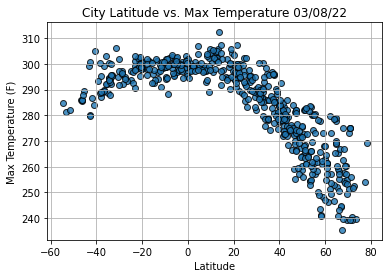

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

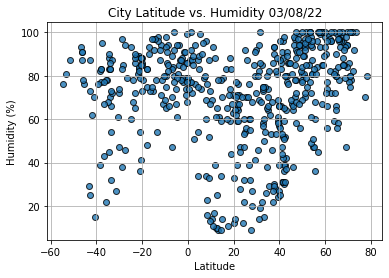

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

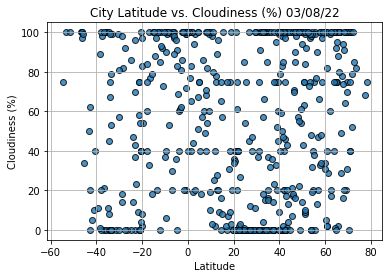

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

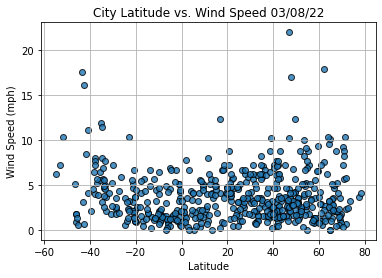

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()